In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras import layers

In [ ]:
# Upload the dataset
uploaded = files.upload()

Saving News_Category_Dataset.json to News_Category_Dataset (1).json


In [ ]:
# Read the data
df = pd.read_json(list(uploaded.keys())[0], lines=True)

Naive Bayes
              precision    recall  f1-score   support

           0       0.64      0.02      0.05       293
           1       0.25      0.01      0.01       275
           2       0.58      0.16      0.25       889
           3       0.55      0.27      0.37      1216
           4       1.00      0.00      0.01       202
           5       0.62      0.23      0.33      1022
           6       0.53      0.53      0.53       713
           7       0.88      0.07      0.13       202
           8       0.91      0.39      0.55       664
           9       0.00      0.00      0.00       209
          10       0.45      0.80      0.58      3419
          11       1.00      0.02      0.04       313
          12       0.00      0.00      0.00       263
          13       0.66      0.63      0.65      1270
          14       0.44      0.01      0.03       270
          15       0.37      0.07      0.11       532
          16       0.36      0.05      0.09      1302
          17   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


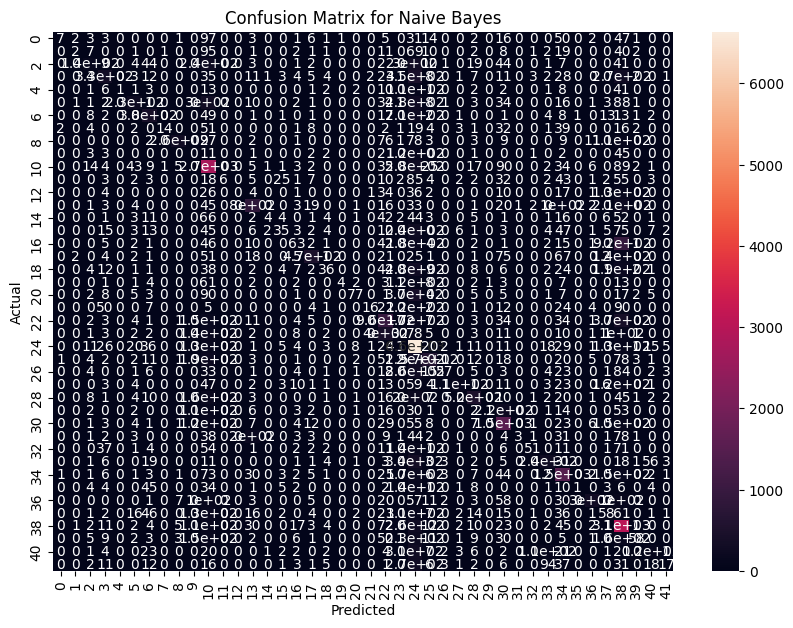

In [ ]:
# Preprocess the texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['headline'].values.astype('U'))

# Convert category to numeric
df['category'] = df['category'].astype('category').cat.codes

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Test the Naive Bayes model
y_pred = nb.predict(X_test)
print("Naive Bayes")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train a SVM model
clf = svm.SVC()
clf.fit(X_train, y_train)

# Test the SVM model
y_pred = clf.predict(X_test)
print("SVM")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train a simple neural network
model = Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(df['category'].nunique(), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

# Test the simple neural network
y_pred = model.predict_classes(X_test)
print("Neural Network")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Neural Network")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()